# SENG 474
# Assignment 2 - Problem 2
# Nolan Kurylo
# V00893175
To execute notebook, ensure ALL cells are run from top to bottom 

References:

1) https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

2) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

3) https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html

4) https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

5) https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [1]:
# 2.1 Hard 
from keras.datasets import mnist
import numpy as np
from sklearn import svm, metrics
np.random.seed(1337)


(train_X, train_y), (test_X, test_y) = mnist.load_data()

# filter for only rows corresponding to 1's and 7's
train_X = train_X[(np.where((train_y == 7 ) | (train_y == 1) )[0])] 
train_y = train_y[(np.where((train_y == 7 ) | (train_y == 1) )[0])]

test_X = test_X[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  
test_y = test_y[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  

train_X = train_X.reshape(train_X.shape[0], 784) 
test_X = test_X.reshape(test_X.shape[0], 784) 

print("Training Hard Margin SVM")

clf = svm.SVC(kernel='linear', C=100000.0) # hard margin -> large C value

clf.fit(train_X, train_y)

validation_prediction = clf.predict(test_X)
training_prediction = clf.predict(train_X) 

training_acc = metrics.accuracy_score(train_y, training_prediction) * 100
training_err = metrics.zero_one_loss(train_y, training_prediction) * 100
validation_acc = metrics.accuracy_score(test_y, validation_prediction) * 100
validation_err = metrics.zero_one_loss(test_y, validation_prediction) * 100

print("Training Accuracy = " + str (training_acc)  + "%")
print("Training Error = " + str (training_err) + "%")

print("Validation Accuracy = " + str(validation_acc)  + "%")
print("Validation Error = " + str (validation_err) + "%")



Training Hard Margin SVM
Training Accuracy = 100.0%
Training Error = 0.0%
Validation Accuracy = 99.16782246879335%
Validation Error = 0.832177531206657%


2.1 Hard

The SVM is extremely accurate in training with 100% accuracy and the validation was very accurate at around ~99% accuracy. The classifier took around 5 seconds to train, which isn't that bad.

In [2]:
# 2.2 Soft
from keras.datasets import mnist
import keras
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, KFold


(train_X, train_y), (test_X, test_y) = mnist.load_data()

# filter for only rows corresponding to 1's and 7's
train_X = train_X[(np.where((train_y == 7 ) | (train_y == 1) )[0])] 
train_y = train_y[(np.where((train_y == 7 ) | (train_y == 1) )[0])]

test_X = test_X[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  
test_y = test_y[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  

train_X = train_X.reshape(train_X.shape[0], 784) 
test_X = test_X.reshape(test_X.shape[0], 784) 

print("Training Soft Margin SVM")

hyperparams = {'C': [0.1, 0.0001, 0.000001], 'kernel': ['linear']} # trying 3 different C hyperparamter values with 5-fold cross validation

models = GridSearchCV(estimator = svm.SVC(), param_grid = hyperparams, cv = KFold(5), verbose=10)
print("Running all 15 combinations of hyperparamters for 5 folds -> this will take a few minutes...")
print()
results = models.fit(train_X, train_y)

best_C = results.best_params_['C']

print("After tuning the hyperparamters, the best value for C is: "+ str(best_C))
print()

training_prediction = results.best_estimator_.predict(train_X)
validation_prediction = results.best_estimator_.predict(test_X)

training_acc = metrics.accuracy_score(train_y, training_prediction) * 100
training_err = metrics.zero_one_loss(train_y, training_prediction) * 100
validation_acc = metrics.accuracy_score(test_y, validation_prediction) * 100
validation_err = metrics.zero_one_loss(test_y, validation_prediction) * 100

print("Training Accuracy = " + str (training_acc)  + "%")
print("Training Error = " + str (training_err) + "%")

print("Validation Accuracy = " + str (validation_acc)  + "%")
print("Validation Error = " + str (validation_err) + "%")




Training Soft Margin SVM
Running all 15 combinations of hyperparamters for 5 folds -> this will take a few minutes...

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START C=0.1, kernel=linear........................................
[CV 1/5; 1/3] END .........C=0.1, kernel=linear;, score=0.995 total time=   2.8s
[CV 2/5; 1/3] START C=0.1, kernel=linear........................................
[CV 2/5; 1/3] END .........C=0.1, kernel=linear;, score=0.994 total time=   2.9s
[CV 3/5; 1/3] START C=0.1, kernel=linear........................................
[CV 3/5; 1/3] END .........C=0.1, kernel=linear;, score=0.994 total time=   3.1s
[CV 4/5; 1/3] START C=0.1, kernel=linear........................................
[CV 4/5; 1/3] END .........C=0.1, kernel=linear;, score=0.994 total time=   2.6s
[CV 5/5; 1/3] START C=0.1, kernel=linear........................................
[CV 5/5; 1/3] END .........C=0.1, kernel=linear;, score=0.994 total time=   2.8s
[CV 1/5; 2/

2.2 Soft

After training the soft margin SVM, the training accuracy was slightly less than 100% training accuracy of the hard margin SVM, however, it achieved better validation accuracy with being higher than 99% validation accuracy of the hard margin SVM.

In [3]:
# 2.3 Kernel
# a) polynomial kernel

from keras.datasets import mnist
import keras
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, KFold


(train_X, train_y), (test_X, test_y) = mnist.load_data()

# filter for only rows corresponding to 1's and 7's
train_X = train_X[(np.where((train_y == 7 ) | (train_y == 1) )[0])] 
train_y = train_y[(np.where((train_y == 7 ) | (train_y == 1) )[0])]

test_X = test_X[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  
test_y = test_y[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  

train_X = train_X.reshape(train_X.shape[0], 784) 
test_X = test_X.reshape(test_X.shape[0], 784) 

print("Training Soft Margin SVM")
sigma= [1, 2, 3] # gamma is 1/(2sigma^2)
hyperparams = {'C': [0.000001], 'kernel': ['poly'], 'degree': [1, 2, 3], 'gamma': 1/(2*np.square(sigma)) } # trying 3 different hyperparamter values for degree and gamma with 2-fold cross validation

models = GridSearchCV(estimator = svm.SVC(cache_size=7000), param_grid = hyperparams, cv=KFold(2),  verbose=10, )
print("Running all 18 combinations of hyperparamters for 2 folds -> this will take a few minutes...")
print()
results = models.fit(train_X, train_y)

# find the best hyperparameters
best_degree = results.best_params_['degree']
best_gamma = results.best_params_['gamma']

print("After tuning the hyperparamters, the best value for a polynomial kernel is with degree: "+ str(best_degree) + " and gamma: " + str(best_gamma))
print()

training_prediction = results.best_estimator_.predict(train_X)
validation_prediction = results.best_estimator_.predict(test_X)

training_acc = metrics.accuracy_score(train_y, training_prediction) * 100
training_err = metrics.zero_one_loss(train_y, training_prediction) * 100
validation_acc = metrics.accuracy_score(test_y, validation_prediction) * 100
validation_err = metrics.zero_one_loss(test_y, validation_prediction) * 100

print("Training Accuracy = " + str (training_acc)  + "%")
print("Training Error = " + str (training_err) + "%")

print("Validation Accuracy = " + str (validation_acc)  + "%")
print("Validation Error = " + str (validation_err) + "%")

Training Soft Margin SVM
Running all 18 combinations of hyperparamters for 2 folds -> this will take a few minutes...

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START C=1e-06, degree=1, gamma=0.5, kernel=poly...................
[CV 1/2; 1/9] END C=1e-06, degree=1, gamma=0.5, kernel=poly;, score=0.996 total time=   7.8s
[CV 2/2; 1/9] START C=1e-06, degree=1, gamma=0.5, kernel=poly...................
[CV 2/2; 1/9] END C=1e-06, degree=1, gamma=0.5, kernel=poly;, score=0.994 total time=   7.6s
[CV 1/2; 2/9] START C=1e-06, degree=1, gamma=0.125, kernel=poly.................
[CV 1/2; 2/9] END C=1e-06, degree=1, gamma=0.125, kernel=poly;, score=0.996 total time=   5.4s
[CV 2/2; 2/9] START C=1e-06, degree=1, gamma=0.125, kernel=poly.................
[CV 2/2; 2/9] END C=1e-06, degree=1, gamma=0.125, kernel=poly;, score=0.994 total time=   5.1s
[CV 1/2; 3/9] START C=1e-06, degree=1, gamma=0.05555555555555555, kernel=poly...
[CV 1/2; 3/9] END C=1e-06, degree=1, gam

2.3 Kernal 

a) Polynomial Kernel

After training the soft margin SVM with a polynomial kernel, the training accuracy was the same as the 100% training accuracy of the hard margin SVM and it achieved nearly the same validation accuracy with being around 99% validation accuracy of the hard margin SVM. This was using the C value of 0.000001 from 2.2, a polynomial degree of 2 and a sigma value of 1.

In [4]:
#2.3 Kernel
# b) Gaussian kernel

from keras.datasets import mnist
import keras
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, KFold

(train_X, train_y), (test_X, test_y) = mnist.load_data()

# filter for only rows corresponding to 1's and 7's
train_X = train_X[(np.where((train_y == 7 ) | (train_y == 1) )[0])] 
train_y = train_y[(np.where((train_y == 7 ) | (train_y == 1) )[0])]

test_X = test_X[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  
test_y = test_y[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  

train_X = train_X.reshape(train_X.shape[0], 784) 
test_X = test_X.reshape(test_X.shape[0], 784) 

print("Training Soft Margin SVM (this takes a 20-25 minutes to train all 6...lol)")

sigma= [1, 2, 3] # gamma is 1/(2sigma^2)
hyperparams = {'C': [0.000001], 'kernel': ['rbf'], 'gamma': 1/(2*np.square(sigma))} # trying 3 different gamma hyperparamter values with 2-fold cross validation

models = GridSearchCV(estimator = svm.SVC(cache_size=7000), param_grid = hyperparams, cv=KFold(2), verbose=10)
print("Running all 6 combinations of hyperparamters for 2 folds -> this will take a few minutes...")
print()
results = models.fit(train_X, train_y)

best_gamma = results.best_params_['gamma']

print("After tuning the hyperparamters, the best value for a gaussian kernel is with gamma: "+ str(best_gamma))
print()

training_prediction = results.best_estimator_.predict(train_X)
validation_prediction = results.best_estimator_.predict(test_X)

training_acc = metrics.accuracy_score(train_y, training_prediction) * 100
training_err = metrics.zero_one_loss(train_y, training_prediction) * 100
validation_acc = metrics.accuracy_score(test_y, validation_prediction) * 100
validation_err = metrics.zero_one_loss(test_y, validation_prediction) * 100

print("Training Accuracy = " + str (training_acc)  + "%")
print("Training Error = " + str (training_err) + "%")

print("Validation Accuracy = " + str (validation_acc)  + "%")
print("Validation Error = " + str (validation_err) + "%")

Training Soft Margin SVM (this takes a 20-25 minutes to train all 6...lol)
Running all 6 combinations of hyperparamters for 2 folds -> this will take a few minutes...

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2; 1/3] START C=1e-06, gamma=0.5, kernel=rbf..............................
[CV 1/2; 1/3] END C=1e-06, gamma=0.5, kernel=rbf;, score=0.524 total time= 1.9min
[CV 2/2; 1/3] START C=1e-06, gamma=0.5, kernel=rbf..............................
[CV 2/2; 1/3] END C=1e-06, gamma=0.5, kernel=rbf;, score=0.512 total time= 2.0min
[CV 1/2; 2/3] START C=1e-06, gamma=0.125, kernel=rbf............................
[CV 1/2; 2/3] END C=1e-06, gamma=0.125, kernel=rbf;, score=0.524 total time= 1.9min
[CV 2/2; 2/3] START C=1e-06, gamma=0.125, kernel=rbf............................
[CV 2/2; 2/3] END C=1e-06, gamma=0.125, kernel=rbf;, score=0.512 total time= 1.9min
[CV 1/2; 3/3] START C=1e-06, gamma=0.05555555555555555, kernel=rbf..............
[CV 1/2; 3/3] END C=1e-06, gamma=0.0

2.3 Kernal 

b) Gaussian Kernel

After training the soft margin SVM with a gaussian kernel, the training accuracy fell to around 50% and it achieved nearly the same validation accuracy with being around 99% validation accuracy of the hard margin SVM. This was using the C value of 0.000001 from 2.2, a polynomial degree of 2 and a sigma value of 1.

In [5]:
# 2.3 Kernel
# c) Linear kernal

from keras.datasets import mnist
import keras
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, KFold

(train_X, train_y), (test_X, test_y) = mnist.load_data()

# filter for only rows corresponding to 1's and 7's
train_X = train_X[(np.where((train_y == 7 ) | (train_y == 1) )[0])] 
train_y = train_y[(np.where((train_y == 7 ) | (train_y == 1) )[0])]

test_X = test_X[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  
test_y = test_y[(np.where((test_y == 7 ) | (test_y == 1) )[0])]  

train_X = train_X.reshape(train_X.shape[0], 784) 
test_X = test_X.reshape(test_X.shape[0], 784) 

print("Training Soft Margin SVM")

hyperparams = {'C': [0.000001], 'kernel': ['linear']}

models = GridSearchCV(estimator = svm.SVC(), param_grid = hyperparams, cv=KFold(2),  verbose=10)
print("Running all 1 combinations of hyperparamters for 2 folds -> this will take a few minutes...")
print()
results = models.fit(train_X, train_y)

best_C = results.best_params_['C']

print("After tuning the hyperparamters, the best value for a linear kernel is with C: "+ str(best_C))
print()

training_prediction = results.best_estimator_.predict(train_X)
validation_prediction = results.best_estimator_.predict(test_X)

training_acc = metrics.accuracy_score(train_y, training_prediction) * 100
training_err = metrics.zero_one_loss(train_y, training_prediction) * 100
validation_acc = metrics.accuracy_score(test_y, validation_prediction) * 100
validation_err = metrics.zero_one_loss(test_y, validation_prediction) * 100

print("Training Accuracy = " + str (training_acc)  + "%")
print("Training Error = " + str (training_err) + "%")

print("Validation Accuracy = " + str (validation_acc)  + "%")
print("Validation Error = " + str (validation_err) + "%")


Training Soft Margin SVM
Running all 1 combinations of hyperparamters for 2 folds -> this will take a few minutes...

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2; 1/1] START C=1e-06, kernel=linear......................................
[CV 1/2; 1/1] END .......C=1e-06, kernel=linear;, score=0.996 total time=   1.8s
[CV 2/2; 1/1] START C=1e-06, kernel=linear......................................
[CV 2/2; 1/1] END .......C=1e-06, kernel=linear;, score=0.995 total time=   1.5s
After tuning the hyperparamters, the best value for a linear kernel is with C: 1e-06

Training Accuracy = 99.74629045898362%
Training Error = 0.2537095410163781%
Validation Accuracy = 99.4914470642626%
Validation Error = 0.5085529357374052%


2.3 Kernal 

c) Linear Kernel

After training the soft margin SVM with a linear kernel, the training accuracy was the BEST yet with nearly 100% accuracy while also having a validation accuracy of around 99%. This was using the C value of 0.000001 from 2.2 and has produced the best SVM seen thus far.

Training AVA ... this will take 30-40 seconds


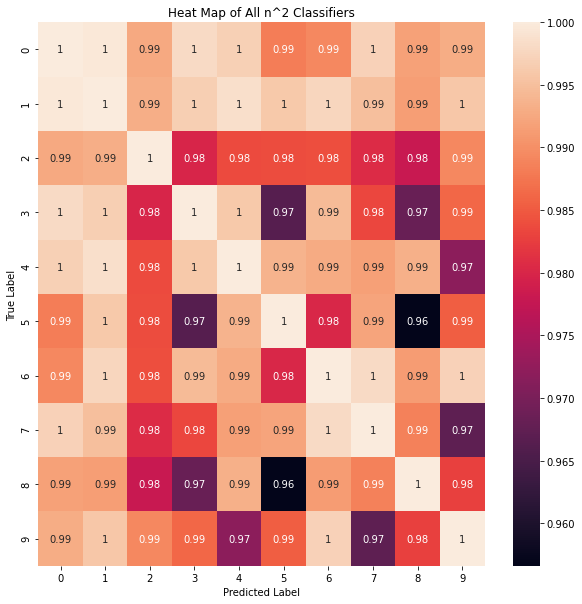

In [6]:
# 2.4 AVA
from keras.datasets import mnist
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import seaborn as sn
from sklearn.svm import LinearSVC
import pandas as pd


(train_X, train_y), (test_X, test_y) = mnist.load_data()

best_C = 0.000001
best_kernel = 'linear'

n = 10 # 10 classes: digits 0,1,...,9

result = np.zeros((10,10)) # store the probabilities from each of the n^2 classifiers

print("Training AVA ... this will take 30-40 seconds")
for i in range(n):
    for j in range(n):
        if i == j:# nothing to classify, always 100%
            result[i][j] = 1.0
            continue
        # filter for only rows corresponding to i's and j's
        temp_train_X = train_X[(np.where((train_y == i ) | (train_y == j) )[0])] 
        temp_train_y = train_y[(np.where((train_y == i ) | (train_y == j) )[0])]

        temp_test_X = test_X[(np.where((test_y == i ) | (test_y == j) )[0])]  
        temp_test_y = test_y[(np.where((test_y == i ) | (test_y == j) )[0])]  

        #flatten X sets into 784 pixels
        temp_train_X = temp_train_X.reshape(temp_train_X.shape[0], 784) 
        temp_test_X = temp_test_X.reshape(temp_test_X.shape[0], 784) 
    
        clf = LinearSVC(C=best_C) # best svm thus far
        clf.fit(temp_train_X, temp_train_y)

        pred = clf.predict(temp_test_X)
        accuracy = (pred == temp_test_y).mean() # find accuracy of current binary classifier
        result[i][j] = accuracy 

plt.subplots(figsize=(10,10))  
columns = [0,1,2,3,4,5,6,7,8,9]
heatmap = pd.DataFrame(result, columns, columns)
sn.heatmap(heatmap, annot_kws={"size": 10}, annot=True) # generate heat map of all n^2 classifiers
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Heat Map of All n^2 Classifiers")
plt.show()

